In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image
from sklearn.metrics import f1_score

In [352]:
# import custom classes
%run eigenfaces.py

# Import data

In [130]:
df_dict = {'label':[]} # dictonary that will be converted in to a dataframe

for i in range(12544):  # 12544 is the number of pixels in our dataset
    df_dict[str(i)] = []

In [131]:
for i in range(5): # number of label/folders in datasets
    for j in range(72): # number of pictures in each folder/ for each label
        path = 'data/development-data-eigenfaces/' + str(i) + '/' +  str(j) + '.png'
        image = Image.open(path).convert('L') # open and convert to grayscale
        data = np.asarray(image).reshape(-1,) # convert to matrix and reshape to vector
        
        df_dict['label'].append(i) # adding data to the 'label' column

        for index, pixel in enumerate(data):
            df_dict[str(index)].append(pixel) # adding data about the pixels


In [132]:
df = pd.DataFrame(df_dict)
df.shape

(360, 12545)

In [133]:
X = df.iloc[:,1:].values
y = df['label'].values

In [134]:
X.shape

(360, 12544)

In [135]:
y.shape

(360,)

# DimensionalityReduction

In [285]:
X.shape

(360, 12544)

In [316]:
model = DimensionalityReduction()
model.fit(X,360)
w = model.transform(X)
w.shape

(360, 360)

In [317]:
reconstructed = (w@model.e_vec.T) + model.avg_vector
reconstructed.shape

(360, 12544)

In [319]:
np.linalg.norm(X-reconstructed)

6.187199498637561e-10

## plotting data in 2D

In [320]:
model = DimensionalityReduction()
model.fit(X,2)
w = model.transform(X)

In [321]:
colors = []

for i in y:
    if i == 0:
        colors.append('green')
    elif i == 1:
        colors.append('red')
    elif i == 2:
        colors.append('blue')
    elif i == 3:
        colors.append('cyan')
    else:
        colors.append('orange')

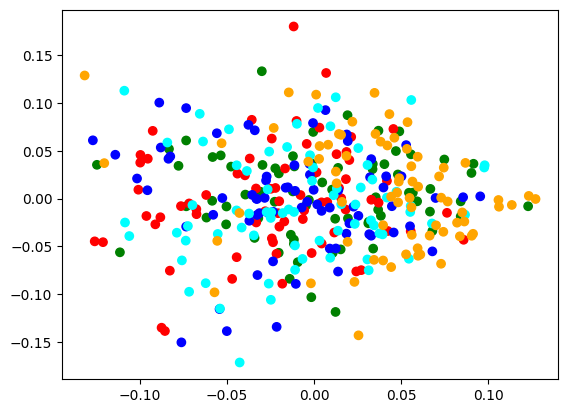

In [322]:
plt.scatter(w[:,0],w[:,1],c=colors)
plt.show()

# ClusteringEig

In [323]:
model = ClusteringEig(n_clusters=5)

In [324]:
model.fit(X)

In [325]:
y_pred = model.predict(X)

In [326]:
f1_score(y, y_pred, average='macro')

0.08608636794368485

# ClusteringKMeans

In [331]:
model = ClusteringKMeans(n_clusters=5,k_dimensions=5)

In [332]:
model.fit(X)

In [333]:
y_pred = model.predict(X)

In [334]:
f1_score(y, y_pred, average='macro')

0.1768888833415867

# MemoryClassfier

In [353]:
model = MemoryClassifier(k_dimensions=10)

In [354]:
model.fit(X,y)

In [356]:
y_pred = model.predict(X)

In [359]:
f1_score(y,y_pred,average='micro')

1.0